In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [4]:
df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]

In [5]:
features = ['latitude',
            'longitude',
            'housing_median_age',
            'total_rooms',
            'total_bedrooms',
            'population',
            'households',
            'median_income'
            ]

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.population.median()

1195.0

<Axes: xlabel='median_house_value', ylabel='Count'>

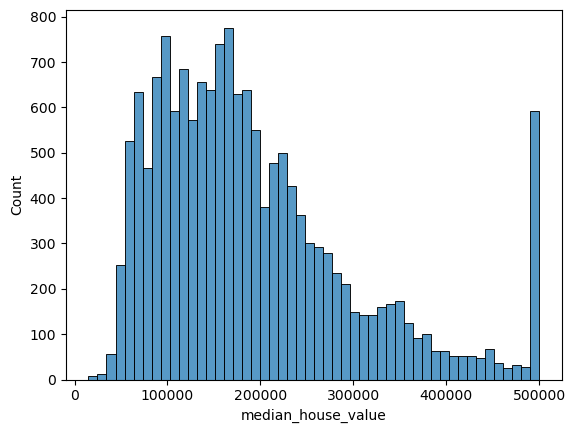

In [8]:
sns.histplot(df.median_house_value, bins=50 )

In [9]:
n = len(df)
nval = ntest = int(n*0.2)
ntrain = n-nval-ntest
ntrain,nval,ntest

(9413, 3137, 3137)

In [10]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:ntrain]]
df_val = df.iloc[idx[ntrain:ntrain+nval]]
df_test = df.iloc[idx[ntrain+nval:]]

df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [11]:
def rmse(y_pred, y_target):
    return np.sqrt(((y_pred-y_target)**2).mean())

In [12]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.c_[ones,X]
    XTX = X.T.dot(X)
    XTXinv = np.linalg.inv(XTX)
    w_full = XTXinv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [13]:
def prepare_X_mean(X):
    return X[features].fillna(mean).values

In [14]:
mean = df_train.total_bedrooms.mean()

In [15]:
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train,y_train)
X_val = prepare_X_mean(df_val)
y_pred = X_val.dot(w)+w0
print(rmse(y_val,y_pred))

0.3405699801454488


In [16]:
def prepare_X_null(X):
    return X[features].fillna(0).values

In [21]:
X_train = prepare_X_null(df_train)
w0, w = train_linear_regression(X_train,y_train)
X_val = prepare_X_null(df_val)
y_pred = X_val.dot(w)+w0
print(rmse(y_val,y_pred))

0.3408479034190544


In [24]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.c_[ones,X]
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTXinv = np.linalg.inv(XTX)
    w_full = XTXinv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [31]:
X_train = prepare_X_null(df_train)
X_val = prepare_X_null(df_val)
smallest_s = 1000
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train,y_train,r)
    y_pred = X_val.dot(w)+w0
    score = rmse(y_val,y_pred)
    smallest_s = r if score < smallest_s else smallest_s
    print(score)
print(smallest_s)

0.3408479034190544
0.3408479061858585
0.3408481800541537
0.3408506921869027
0.3408779300441085
0.3412862042015464
0.34489583276618196
0.3477398070484238
0.34831498335209427
0


### Q3

In [36]:
scores = []
for s in range(10):
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:ntrain]]
    df_val = df.iloc[idx[ntrain:ntrain+nval]]
    df_test = df.iloc[idx[ntrain+nval:]]

    df_train.reset_index(drop=True)
    df_val.reset_index(drop=True)
    df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X_null(df_train)
    w0, w = train_linear_regression(X_train,y_train)
    X_val = prepare_X_null(df_val)
    y_pred = X_val.dot(w)+w0
    scores.append(rmse(y_val,y_pred))
    
print(scores)    
print(round(np.std(scores),2))


[0.3377387160116084, 0.33779993536514896, 0.338428700676665, 0.3320049468304345, 0.3394451862557017, 0.34338197052856695, 0.3385330211771872, 0.34687476973041953, 0.3512736865959646, 0.3341558266526926]
0.01


In [48]:
s = 9
idx = np.arange(n)
np.random.seed(s)
np.random.shuffle(idx)

df_train = df.iloc[idx[:ntrain]]
df_val = df.iloc[idx[ntrain:ntrain+nval]]
df_test = df.iloc[idx[ntrain+nval:]]

df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full = pd.concat([df_train, df_val])
y_full = np.r_[y_train, y_val]

X_full = prepare_X_null(df_full)
w0, w = train_linear_regression(X_full,y_full)

X_test = prepare_X_null(df_test)

y_pred = X_test.dot(w)+w0
print(rmse(y_pred,y_test))

0.3349877884546482
